## MODEL CREATION & EVALUATION :

->Loading pre-process data

->Define dependant & independant features

->Balancing the target feature

->Split training and testing data

->Model creation, prediction & evaluation

->Model saving

## IMPORT NECESSARY LIBRARY

In [685]:
import pandas as pd
import numpy as np
from scipy import stats

import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

## LOADING PREPROCESS DATA

In [688]:
data = pd.read_csv('employee_performance_analysis_preprocessed_data.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,4.479794,-1.625800,1.048152,-0.935689,0.917397,1.027783,0.831539,1.471238,0.515184,-0.449498,-1.242865,-0.169772,0.859328,0.263105,-1.361126,0.655418,-0.888525,-0.099724,0.470607,-0.012552,-0.192366,-0.199055,0.502891,0.228337,0.352744,3
1,4.356074,-0.068289,2.016174,-1.516783,-0.418864,-0.582535,1.714894,-0.026681,0.985278,-0.830725,-1.723557,1.171481,-0.265575,-0.276425,-0.133615,0.157664,-0.505885,0.359134,-0.420803,0.929058,0.495041,-0.306019,0.888367,-0.237236,0.710042,3
2,4.243181,2.560962,4.363072,0.182532,1.773880,-0.362873,0.431528,-1.308032,0.449781,-1.957530,0.189355,2.290069,1.197808,-0.131160,-0.786889,1.267936,0.624628,-0.504683,-0.559195,-0.081618,0.256092,0.242872,0.434724,-0.356724,-0.646996,4
3,-3.013748,0.725983,2.326672,-3.288183,-2.309574,1.909985,-1.083119,0.226786,-0.112988,0.191132,-0.139197,-1.408616,0.384020,-1.151003,-0.504962,-1.558104,0.273501,-0.891281,1.533583,-0.700066,-0.113402,0.186438,0.566017,-0.066069,0.500048,3
4,4.246565,5.966600,-0.246302,-0.789979,-2.096761,-1.712339,-0.769025,0.516950,0.788577,-1.125638,-1.642460,0.142828,0.727865,0.051626,1.509516,-0.652274,-0.614179,0.295793,-0.970469,1.179984,-0.793859,0.107046,0.218167,0.456973,0.147894,3


### DEFINE INDEPENDANT & DEPENDANT FEATURES

In [691]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [693]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,4.479794,-1.625800,1.048152,-0.935689,0.917397,1.027783,0.831539,1.471238,0.515184,-0.449498,-1.242865,-0.169772,0.859328,0.263105,-1.361126,0.655418,-0.888525,-0.099724,0.470607,-0.012552,-0.192366,-0.199055,0.502891,0.228337,0.352744
1,4.356074,-0.068289,2.016174,-1.516783,-0.418864,-0.582535,1.714894,-0.026681,0.985278,-0.830725,-1.723557,1.171481,-0.265575,-0.276425,-0.133615,0.157664,-0.505885,0.359134,-0.420803,0.929058,0.495041,-0.306019,0.888367,-0.237236,0.710042
2,4.243181,2.560962,4.363072,0.182532,1.773880,-0.362873,0.431528,-1.308032,0.449781,-1.957530,0.189355,2.290069,1.197808,-0.131160,-0.786889,1.267936,0.624628,-0.504683,-0.559195,-0.081618,0.256092,0.242872,0.434724,-0.356724,-0.646996
3,-3.013748,0.725983,2.326672,-3.288183,-2.309574,1.909985,-1.083119,0.226786,-0.112988,0.191132,-0.139197,-1.408616,0.384020,-1.151003,-0.504962,-1.558104,0.273501,-0.891281,1.533583,-0.700066,-0.113402,0.186438,0.566017,-0.066069,0.500048
4,4.246565,5.966600,-0.246302,-0.789979,-2.096761,-1.712339,-0.769025,0.516950,0.788577,-1.125638,-1.642460,0.142828,0.727865,0.051626,1.509516,-0.652274,-0.614179,0.295793,-0.970469,1.179984,-0.793859,0.107046,0.218167,0.456973,0.147894


In [695]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

## BALANCING THE TARGET FEATURE

**SMOTE:** SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [700]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


### SPLIT TRAINING AND TESTING DATA

In [703]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20) # 20% data given to testing

In [705]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2097, 25), (525, 25), (2097,), (525,))

## MODEL CREATION, PREDICTION AND EVALUATION

#### AIM

Create a sweet spot model (Low bias, Low variance)

### HERE WE WILL BE EXPERIMENTING WITH THREE ALGORITHM

**->Support Vector Machine**

**->Random Forest**

**->Artificial Neural Network**

### 1.Support Vector Machine

In [719]:
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

### TRAINING ACCURACY

In [722]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 96.6618979494516
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       1.00      0.95      0.97       726
           3       0.91      0.99      0.95       647
           4       0.99      0.97      0.98       724

    accuracy                           0.97      2097
   macro avg       0.97      0.97      0.97      2097
weighted avg       0.97      0.97      0.97      2097



Support vector classifier perform well on training data

### TESTING ACCURACY

In [726]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 95.04761904761905
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.94      0.96       193
           3       0.87      0.97      0.92       155
           4       0.99      0.94      0.97       177

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



In testing score is still lagging so we are going to do hyperparameter tunning with the help of grid search cv

### HYPER PARAMETER TUNNING WITH GRID SEARCH CV

In [730]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,0.5,10,50,60,70,80],
             'gamma':[1,0.1,0.001,0.0001,0.00001],
             'random_state':(list(range(1,20)))}
model = SVC() # Object creation
grid = GridSearchCV(model,param_grid,refit=True,verbose=2,scoring='f1',cv=5)

# Step:10 fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 665 candidates, totalling 3325 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.1s
[CV] END .....................C=0.1, gamma=1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 10, 50, 60, 70, 80],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [732]:
# set the best parameter 
clf =SVC(C=0.6,gamma=0.1,random_state=1)

# fit the model
clf.fit(X_train,y_train)

# Predict the x test
y_hat_clf = clf.predict(X_test)

#### TESTING ACCURACY AFTER HYPERPARAMETER TUNNING

In [735]:
test_accuracy = accuracy_score(y_hat_clf,y_test)
print("Testing accuracy of support vector classifier model",test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(y_hat_clf,y_test))

Testing accuracy of support vector classifier model 97.33333333333334
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.96      0.99      0.98       177
           3       0.97      0.95      0.96       177
           4       0.99      0.98      0.99       171

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



After hyperparameter tunning score is increases

### 2.Random Forest

In [783]:
# importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(X_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)

#### TRANING ACCURACY

In [847]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       701
           4       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



Random forest classifier very well work on training data.

#### TESTING ACCURACY

In [806]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 95.80952380952381
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.98      0.96      0.97       187
           3       0.91      0.96      0.94       164
           4       0.98      0.95      0.96       174

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



#### HYPER PARAMETER TUNNING WITH RANDOMIZED SEARCH CV

In [793]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Parameters setup
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['sqrt', 'log2']  # Replace 'auto' with valid options
max_depth = [int(x) for x in np.linspace(10, 100, num=11)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 8]
min_samples_leaf = [1, 2, 3, 4]

# Creating parameter grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Model initialization
rf_clf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV setup
rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=random_grid,
    scoring='f1',
    n_iter=10,
    cv=2,
    verbose=2,
    random_state=1,
    n_jobs=-1
)

# Fitting the training data
rf_cv.fit(X_train, y_train)

# Get the best parameters
rf_best_params = rf_cv.best_params_
print(f"Best parameters: {rf_best_params}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters: {'n_estimators': 311, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 37}


In [795]:
# Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Fitting the training data
rf_clf1.fit(X_train,y_train)

# Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)

#### TEST ACCURACY AFTER HYPER-PARAMETER TUNNING

In [798]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 95.61904761904762
Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.96      0.97       187
           3       0.90      0.97      0.93       161
           4       0.99      0.94      0.96       177

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



#### 3.Artificial Neural Network 

In [826]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [828]:
# Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [830]:
# Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[4.53529374e-05, 9.99954638e-01, 9.42488432e-09],
       [1.45409132e-03, 9.97544471e-01, 1.00143741e-03],
       [9.16158942e-01, 8.23961146e-02, 1.44494384e-03],
       ...,
       [9.83034282e-01, 1.69635535e-02, 2.16494660e-06],
       [3.17262841e-02, 9.68265862e-01, 7.85398779e-06],
       [2.05030901e-20, 1.73954731e-09, 9.99999998e-01]])

In [832]:
# Prediction on test data
mlp_test_predict = model.predict(X_test)

# Prediction on training data
mlp_train_predict = model.predict(X_train)

#### TRAINING ACCURACY

In [835]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 99.28469241773963
Classification report of training:
               precision    recall  f1-score   support

           2       1.00      0.98      0.99       705
           3       0.98      1.00      0.99       686
           4       1.00      1.00      1.00       706

    accuracy                           0.99      2097
   macro avg       0.99      0.99      0.99      2097
weighted avg       0.99      0.99      0.99      2097



Multilayer percepton Perform well on training data.

#### TESTING ACCURACY

In [839]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Precision Score:",precision_score(mlp_test_predict, y_test, average='weighted')*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 96.19047619047619
Precision Score: 96.3760411092476
Classification report of testing:
               precision    recall  f1-score   support

           2       0.99      0.95      0.97       191
           3       0.91      0.98      0.94       161
           4       0.99      0.96      0.97       173

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



Multilayer percepton perform well on testing data

#### CONFUSION MATRIX

In [843]:
pd.crosstab(mlp_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,182,9,0
3,2,157,2
4,0,7,166


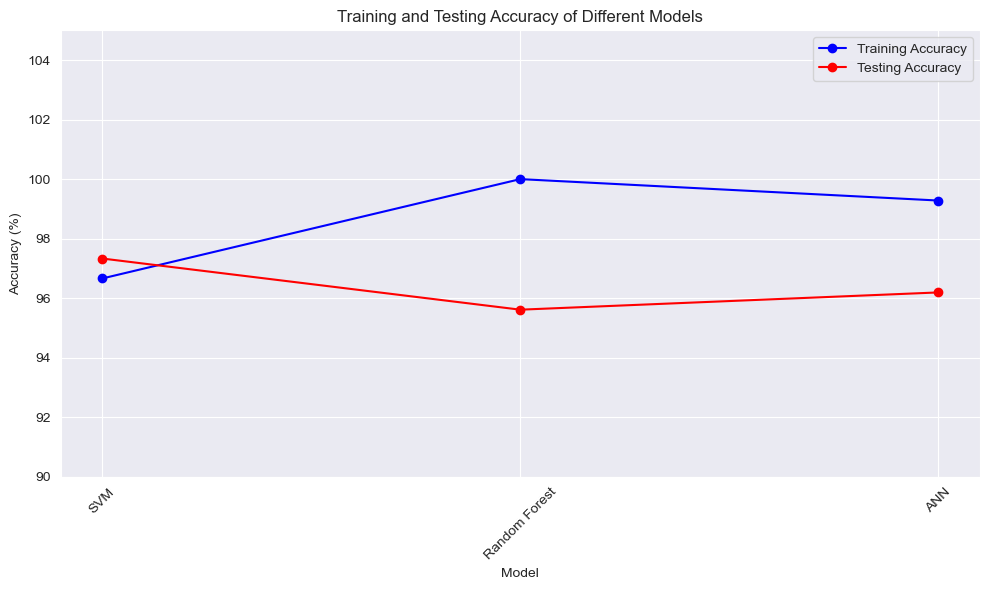

In [849]:
import matplotlib.pyplot as plt

# Model names
models = ['SVM', 'Random Forest', 'ANN']

# Training accuracies
training_accuracies = [96.66, 100, 99.28]

# Testing accuracies
testing_accuracies = [97.33, 95.61, 96.19]

# Plotting
plt.figure(figsize=(10, 6))

# Plot training accuracies
plt.plot(models, training_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')

# Plot testing accuracies
plt.plot(models, testing_accuracies, marker='o', linestyle='-', color='r', label='Testing Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy of Different Models')
plt.ylim(90, 105)  # Setting y-axis limit
plt.legend()
plt.grid(True)  # Add grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### Conclusion:

**SVM (Support Vector Machine):**

->Testing accuracy (97.5%) is higher than training accuracy (96.5%), which is unusual but suggests good generalization.

->No signs of overfitting.

**Random Forest:**

->Perfect training accuracy (~100%), indicating overfitting.

->Testing accuracy drops to 96%, showing the model memorized the training data but generalizes poorly.

**ANN (Artificial Neural Network):**

->Training Accuracy: ~98%

->Testing Accuracy: ~97%

->The gap between training and testing accuracy is minimal, suggesting good generalization.

**Among these models ANN is the best choice as it balances training and testing accuracy well.**

## MODEL SAVING

In [855]:
# saving model with the help of pickle
import pickle

file = open('mlp_classifier_model.pkl','wb')
pickle.dump(model,file)